##### Reduct carbon triple bond to double bond
The training data contains 12 reactions while the test data only includes 3 reactions.

However, the prediction results are good, all of the anticipated products match the real ones!

In [1]:
import sys
sys.path.append('../../darknight/')
import functions
import numpy as np
import pandas as pd
import darkchem
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import PandasTools,Draw

Using TensorFlow backend.


In [2]:
#load model
model = darkchem.utils.load_model('../../models/N7b_[M+H]')

In [3]:
#load train data
data = pd.read_csv('CT2C2_train.csv') 

In [4]:
#the average of path vector
pathT = functions.path_vec(data,model)

In [5]:
#load test data
testdf = pd.read_csv('CT2C2_test.csv')

In [6]:
testdf

,Reactants,Products
0,C#CCCCCCCCCCC,C=CCCCCCCCCCC
1,CCC/C=C/CC#CCO,CCCC=CC/C=C/CO
2,CCCCCCC#CCO,CCCCCC/C=C\CO


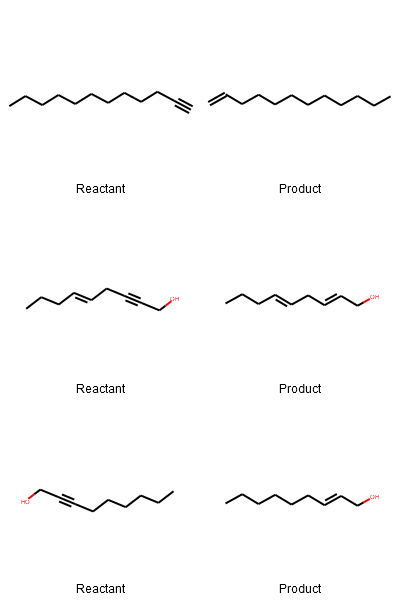

,Reactants,Products
0,C#CCCCCCCCCCC,C=CCCCCCCCCCC
1,CCC/C=C/CC#CCO,CCC/C=C/CC=CCO
2,CCCCCCC#CCO,CCCCCCC=CCO


In [7]:
functions.output_multiple_prod(testdf,model,pathT)

##### This type reaction doesn't work 

In [8]:
#load train data
data2 = pd.read_csv('../NC_Triple_Bond/NH2_train.csv')

In [9]:
#the average of path vector
pathT2 = functions.path_vec(data2,model)

In [10]:
#load test data
testdf2 = pd.read_csv('../NC_Triple_Bond/NH2_test.csv')

In [11]:
testdf2.head()

,Reactants,Products
0,CCOc1ccc(C#N)cn1,CCOc1ccc(CN)cn1
1,Cc1ccc(CC#N)nc1,Cc1ccc(CCN)nc1


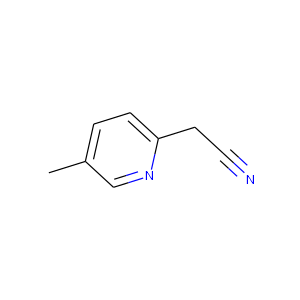

In [12]:
mol = Chem.MolFromSmiles('Cc1ccc(CC#N)nc1') 
Draw.MolToImage(mol)

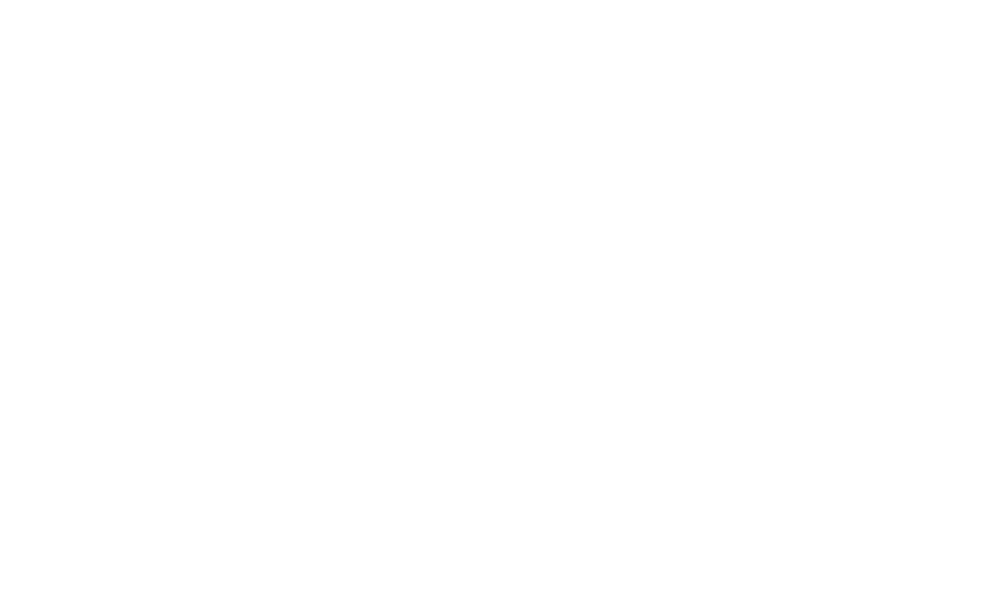

,Reactant,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product
0,Cc1ccc(CC#N)nc1,,,,,,,,,,,,,,,


In [13]:
smi = 'Cc1ccc(CC#N)nc1'
functions.pred_single_prod(smi,model,pathT2,k=15)

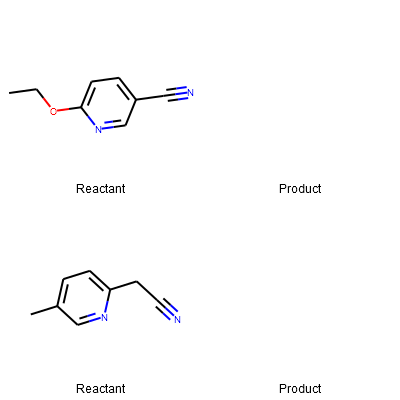

,Reactants,Products
0,CCOc1ccc(C#N)cn1,
1,Cc1ccc(CC#N)nc1,


In [14]:
functions.output_multiple_prod(testdf2,model,pathT2)

#### Display the reactants smiles strings with their molecule structures

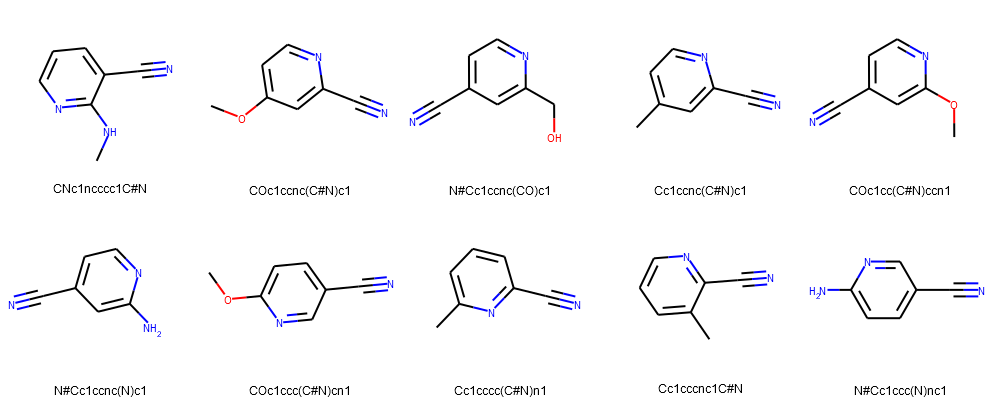

In [15]:
functions.MolStructure(data2,'Reactants')

#### Display the actual products smiles strings with their molecule structures

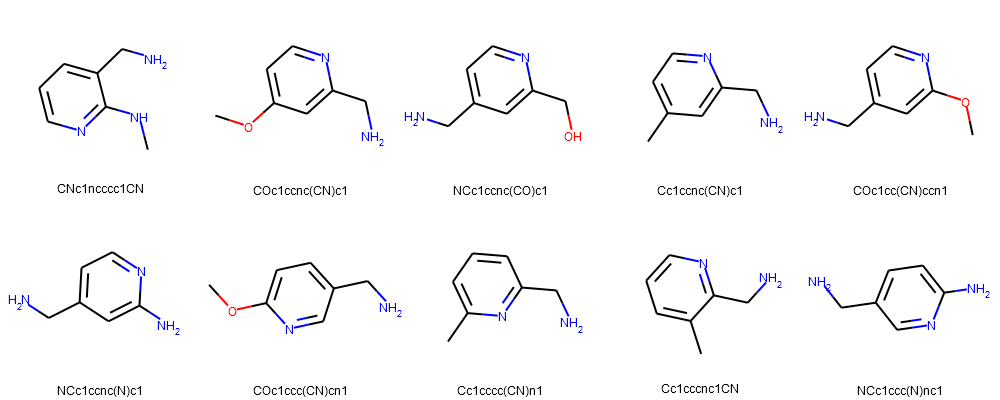

In [16]:
functions.MolStructure(data2,'Products')